$$\newcommand{\Rv}{\mathbf{R}}
\newcommand{\rv}{\mathbf{r}}
\newcommand{\Qv}{\mathbf{Q}}
\newcommand{\Qnv}{\mathbf{Qn}}
\newcommand{\Av}{\mathbf{A}}
\newcommand{\Aiv}{\mathbf{Ai}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\Uv}{\mathbf{U}}
\newcommand{\uv}{\mathbf{u}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\TDv}{\mathbf{TD}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\Gv}{\mathbf{G}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\betav_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}
$$

# Reinforcement Learning with Neural Network as Q Function

## Reinforcement Learning Objective

The objective for any reinforcement learning problem is to
find the sequence of actions that maximizes (or minimizes) the sum
of reinforcements along the sequence.
This is reduced to the objective of acquiring the Q function the
predicts the expected sum of future reinforcements, because the
correct Q function
determines the optimal next action.

So, the RL objective is to make this approximation as accuracte as possible:

$$
    \begin{align*}
      Q(s_t,a_t) \approx \sum_{k=0}^\infty r_{t+k+1}
    \end{align*}
$$

This is usually formulated as the least squares objective

$$
    \begin{align*}
      \text{Minimize } \mathrm{E} \left ( \sum_{k=0}^\infty r_{t+k+1} - Q(s_t,a_t)\right )^2
    \end{align*}
$$

What is that expectation taken over?

Sources of randomness:

   * action selection
   * state transitions
   * reinforcement received

Of course, the key problem is that we don't know $\sum_{k=0}^\infty r_{t+k+1}$. What do we do?

Approximate it by 

$$
    \begin{align*}
      \sum_{k=0}^\infty r_{t+k+1}  = & r_{t+1} + \sum_{k=1}^\infty r_{t+k+1}\\
       = & r_{t+1} + \sum_{k=0}^\infty r_{t+1+k+1}\\
       \approx & r_{t+1} + Q(s_{t+1},a_{t+1})
    \end{align*}
$$

## Gradient of Objective

Now our minimization problem is the following.  Let $Q$ be a
parameterized function, with parameters $\wv$.  How do we try to
minimize it? 

$$
    \begin{align*}
      \text{Minimize }  J(\wv)  &= \mathrm{E} \left ( \sum_{k=0}^\infty r_{t+k+1} - Q(s_t,a_t;\wv)\right )^2\\
      & = \mathrm{E} \Bigl ( r_{t+1} + Q(s_{t+1},a_{t+1};\wv) - Q(s_t,a_t;\wv) \Bigr )^2
    \end{align*}
$$


Right!  Take the gradient of $J(\wv)$ with respect to $\wv$ and do
gradient descent.  $Q$ appears twice in this expression.  A very
common approach is to only take the gradient with respect to
$Q(s_t,a_t;\wv)$ and treat $Q(s_{t+1},a_{t+1};\wv)$ as constant. Not
correct, but works well and simplifies the resulting algorithm.

Recall that the expectation operator is a sum of possible values,
weighted by their probabilities.  If $d$ is the value on the top
of a (fair) dice, 

$$
    \begin{align*}
      \mathrm{E} (d) = \frac{1}{6} 1 + \frac{1}{6} 2 + \frac{1}{6} 3 + \frac{1}{6} 4 + \frac{1}{6} 5 + \frac{1}{6} 6
    \end{align*}
$$

So the gradient of an expected value is the expected value of the gradients.

$$
    \begin{align*}
      \grad_{\wv}  J(\wv) = 
       2 \mathrm{E} \Bigl ( r_{t+1} + Q(s_{t+1},a_{t+1};\wv) - Q(s_t,a_t;\wv) \Bigr ) (-1) \grad_{\wv} Q(s_t,a_t,;\wv)
    \end{align*}
$$

The expectation operator requires knowledge of the probabilities of
all of those random effects.  Instead, we will just sample the world.   

More probable events will take place more often.  If we just add updates to $\wv$ for each sample, we effectively have done the expectation.

## Gradient for Q function as Table

What is the gradient with $Q$ is a table, like the maze and the tic-tac-toe problem?
We must first decide what the $\wv$ parameters are for a table.

They are just the entries in the table.  Can formulate the selection
of the correct parameter in the table as a dot product. 

Let $\xv_t$ be a column vector of length equal to the number of table
cells and with values that are all 0's and a single 1.  The 1
designates the cell corresponding to $s_t$ and $a_t$. Then

$$
    \begin{align*}
      Q(s_t,a_t;\wv) = \xv_t^T \wv
    \end{align*}
$$

So, 

$$
    \begin{align*}
      \grad_{\wv} Q(s_t,a_t;\wv) &= \grad_{\wv} (\xv_t^T \wv)\\
      & = \xv_t
    \end{align*}
$$


Let's define the temporal-difference error to be $\delta_t$

$$
    \begin{align*}
      \delta_t &= r_{t+1} + Q(s_{t+1},a_{t+1};\wv) - Q(s_t,a_t;\wv)
    \end{align*}
$$

Now

$$
    \begin{align*}
      \grad_{\wv} J(\wv) & = 2 \mathrm{E} \Bigl ( \delta_t  (-1) \grad_{\wv} Q(s_t,a_t,;\wv) \Bigr )\\
      & = -2 \mathrm{E} (\delta_t  \xv_t)\\
      & = \begin{cases}
        -2 \mathrm{E} (\delta_t) , & \text{ for cell for } s_t, a_t;\\
        0, & \text{ for all other cells}
      \end{cases}
    \end{align*}
$$

Replacing the expectation with samples, we get the TD update rule for Q tables

$$
    \begin{align*}
      \wv &\leftarrow \wv - \grad_{\wv} J(\wv)\\
       &\leftarrow \wv + \rho \delta_t \xv_t
    \end{align*}
$$

which is really the same as what we have seen before,

$$
    \begin{align*}
      Q(s_t,a_t)  &\leftarrow Q(s_t,a_t)  + \rho \delta_t
%%      Q(s_t,a_t)  &\leftarrow Q(s_t,a_t)  + \rho \Bigl (r_{t+1} + Q(s_{t+1},a_{t+1};\wv) - Q(s_t,a_t;\wv)\Bigr )
    \end{align*}
$$

where the update to just the $s_t,a_t$ cell of Q was implicit.

## Gradient for Q function as Neural Network

Using a table for Q has limited use.  

   * Size of table might be too big.
   * Learning could be slow.  Experience in one cell does not transfer to other cells.

Let's use a different function approximator.  Uhhh...what shall we use?

Brilliant!   A neural network! What has to change in our derivation of the gradient?

We want to approximate $Q(s_t,a_t;\wv)$ with a neural network.  The
values of $\wv$ are the $V$ and $W$ weights. 

Looks like the neural network will have a single output value and inputs for $s_t$ and $a_t$.  To find best action, we would input $s_t$ and try all possible actions $a_t$, calculating the
output of the network for each.  Then pick the action that produces the best neural network output.

Remember the objective function that we wish to minimize,

$$
    \begin{align*}
      \text{Minimize }  J(\wv)  &= \mathrm{E} \left ( \sum_{k=0}^\infty r_{t+k+1} - Q(s_t,a_t;\wv)\right )^2\\
      & = \mathrm{E} \Bigl ( r_{t+1} + Q(s_{t+1},a_{t+1};\wv) - Q(s_t,a_t;\wv) \Bigr )^2,
    \end{align*}
$$

and its gradient, which is

$$
    \begin{align*}
      \grad_{\wv}  J(\wv) = 
       2 \mathrm{E} \Bigl ( r_{t+1} + Q(s_{t+1},a_{t+1};\wv) - Q(s_t,a_t;\wv) \Bigr ) (-1) \grad_{\wv} Q(s_t,a_t,;\wv).
    \end{align*}
$$

We replace the expectation operator with samples, at time $t$.

$$
    \begin{align*}
      \grad_{\wv_t}  J(\wv_t) = 
       -2 \Bigl ( r_{t+1} + Q(s_{t+1},a_{t+1};\wv_t) - Q(s_t,a_t;\wv_t) \Bigr ) \grad_{\wv_t} Q(s_t,a_t,;\wv_t).
    \end{align*}
$$


What remains is to calculate 

$$
    \begin{align*}
     \grad_{\wv_t} Q(s_t,a_t,;\wv_t).
    \end{align*}
$$

but we have seen this before, when calculating the gradient of the output of a neural network with respect to its weights, $\wv = (V,W)$.  So, the only change to our previous algorithm for training a neural network to do nonlinear regression is that we use the temporal-difference error rather than the target-output error.

Here are the gradient descent updates we had for nonlinear regression neural networks.

$$
    \begin{align*}
      \Zv &= h(\tilde{\Xv} \Vv)\\
      \Yv &= \tilde{\Zv} \Wv\\
       \Vv & \leftarrow \Vv + \rho_h \frac{1}{N} \frac{1}{K} \tilde{\Xv}^T \left ( (\Tv - \Yv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
      \Wv & \leftarrow \Wv + \rho_o \frac{1}{N}\frac{1}{K} \tilde{\Zv}^T (\Tv - \Yv)
      \end{align*}
$$

The key change we need to make is in the error.  Our targets are now given by a reinforcement plus the next step predicted Q values.  Must assemble a bunch of samples into matrices.  

Multiple $s_t, a_t$ tuples will be collected as rows in $\Xv$, which, when passed through the neural network, produce $\Zv$ and $\Yv = \Qv$, because the output $\Yv$ of the network we are taking as our $Q$ value, the estimate of the expected return.  

Reinforcements received, $r_{t+1}$'s, will be collected as rows of $\Rv$. 

Now just need $Q(s_{t+1},a_{t+1})$'s.  These are really like rows of $\Yv$ shifted up by one row, which we will call $\Qnv$, for $Q_{\mbox{next}}$.

Now we can rewrite the gradient descent updates.  Assume
we have $\Xv$, $\Rv$, $\Qnv$, $\Qv$, all but $\Xv$
having one column.

$$
    \begin{align*}
      \TDv &= \Rv + \Qnv - \Qv\\
      \Zv &= \tanh(\tilde{\Xv} \Vv)\\
      \Vv & \leftarrow \Vv + \rho_h \frac{1}{N} \tilde{\Xv}^T \left ( \TDv\; \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
      \Wv & \leftarrow \Wv + \rho_o \frac{1}{N} \tilde{\Zv}^T \;\TDv
      \end{align*}
$$

## Dealing with Infinite Sums

For non-episodic tasks (no final state), the desired sum of
reinforcements is over an infinite future.

This will grow to infinity unless forced to be a finite
value. Will use common approach of **discounting** reinforcements,
discounting ones more 
that occur further into the future.

$$
    \begin{align*}
      Q(s_t,a_t) &= \sum_{k=0}^{\infty} \gamma^k r_{t+k+1}, \text{ for
      } 0 < \gamma  < 1.
    \end{align*}
$$

We must introduce this discounting into the objective function

$$
    \begin{align*}
      \text{Minimize }  J(\wv)  &= \mathrm{E} \left (
      \sum_{k=0}^\infty \gamma^k r_{t+k+1} - Q(s_t,a_t;\wv)\right )^2\\
      & = \mathrm{E} \Bigl ( \gamma^0 r_{t+1} + \sum_{k=1}^\infty \gamma^k r_{t+k+1} - Q(s_t,a_t;\wv) \Bigr )^2\\
      & = \mathrm{E} \Bigl ( \gamma^0 r_{t+1} + \sum_{k=0}^\infty \gamma^{k+1} r_{t+k+1+1} - Q(s_t,a_t;\wv) \Bigr )^2\\
      & = \mathrm{E} \Bigl ( \gamma^0 r_{t+1} + \gamma \sum_{k=0}^\infty \gamma^k r_{t+k+1+1} - Q(s_t,a_t;\wv) \Bigr )^2\\
      & = \mathrm{E} \Bigl ( r_{t+1} + \gamma Q(s_{t+1},a_{t+1};\wv) - Q(s_t,a_t;\wv) \Bigr )^2
    \end{align*}
$$

So, we simply add the multiplication by $\gamma$ to the next
state-action Q value in the temporal-difference error.

## Using Batch-Oriented Algorithm for Non-Stationary Learning Task

These are batch updates, remember?  Before, we had all input and
target samples in $\Xv$ and $\Tv$.   Now one set of samples are collected for one set of weight values, meaning for one Q function.

After updates, we have a new Q function, which will produce different
actions.  So what?  

We must repeat the steps:

   * Generate $N$ samples.
   * Update $\Vv$ and $\Wv$.

in small-ish batches.  Also, must not train for too many iterations each time.  If we do train to convergence each time, the neural network can forget everything it learned from previous samples.

## 1-D Maze Example


Imagine a chain of states, numbered 1 through 10.  From any state you
can move left by one state, stay put, or move right.  Moves off the
ends are not permitted.  The goal is to be in state 5.  Let's assign
reinforcements of -1 for every move except ones that result in being
in state 5, for which you get reinforcmement of 0.  This will drive
the agent to get to state 5 as quickly as possible.

![image](http://www.cs.colostate.edu/~anderson/cs545/notebooks/rlstatechain.png)


So, the state is an integer from 1 through 10. Let's approximate the Q function by  a  neural network
with 2 inputs for the integer state and the integer action, 6 hidden units, and 1 output.


$$
    \begin{align*}
    s_t &\in \{1,2,3,4,5,6,7,8,9,10\}\\[3mm]
    a_t &= \begin{cases}
           -1; \text{ for action left},\\
           0; \text{ for action stay},\\
           1; \text{ for action right}
           \end{cases}\\[3mm]
    s_{t+1} &= s_t + a_t\;\;\; \text{bounded to be between 1 and 10}
    \end{align*}
$$



![image](http://www.cs.colostate.edu/~anderson/cs545/notebooks/nntwolayerq.png)


![image](http://www.cs.colostate.edu/~anderson/cs545/notebooks/1dmazenn.png)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import neuralnetworksbylayer as nn 

Available actions step left, stay put, and step right.  Represented as change in position, they are

In [3]:
validActions = [-1, 0, 1]

Now let's define our epsilon-greedy function.

In [4]:
def epsilonGreedy(nnetQ, state, validActions, epsilon):
    if np.random.uniform() < epsilon:
        # Random Move
        action = np.random.choice(validActions)
    else:
        # Greedy Move
        actionsRandomlyOrdered = random.sample(validActions, len(validActions))
        Qs = [nnetQ.use(np.array([[state,a]])) for a in actionsRandomlyOrdered]
        ai = np.argmax(Qs)
        action = actionsRandomlyOrdered[ai]
    Q = nnetQ.use(np.array([[state,action]]))
    return action, Q

Now we need a function, `makeSamples`, for collecting a bunch of samples of state, action, reinforcement, next state, next actions.  We can make this function generic by passing in functions to create the initial state, the next state, and the reinforcement value.

In [5]:
def initialState():
    return np.random.randint(1,11)

def nextState(s, a):
    newstate = min(max(1,s+a), 10)
    features = newstate  # can create features of state, instead of directly using state here
    return newstate, features

def reinf(s, sn):  # next state
    return 0 if sn is 5 else -1

In [6]:
def makeSamples(nnet, initialStateF, nextStateF, reinforcementF,
                validActions, numSamples, epsilon):

    X = np.zeros((numSamples, nnet.layers[0].nInputs))
    R = np.zeros((numSamples, 1))
    Qn = np.zeros((numSamples, 1))

    s = initialStateF()
    s, features = nextStateF(s, 0)        # Update state, sn from s and a
    a, _ = epsilonGreedy(nnet, s, validActions, epsilon)

    # Collect data from numSamples steps
    for step in range(numSamples):
        sn, featuresn = nextStateF(s, a)        # Update state, sn from s and a
        rn = reinforcementF(s, sn)   # Calculate resulting reinforcement
        an, qn = epsilonGreedy(nnet, featuresn, validActions, epsilon) # Forward pass for time t+1
        X[step, :] = (features, a)
        R[step, 0] = rn
        Qn[step, 0] = qn
        # Advance one time step
        s, features, a = sn, featuresn, an

    return (X, R, Qn)

In [7]:
def plotStatus():
    n = 100
    xs = np.linspace(1,10,n).reshape((-1,1))
    xsas = np.vstack((xs,xs,xs))
    ones = np.ones((n,1))
    xsas = np.hstack((xsas, np.vstack((ones*-1,ones*0,ones*1))))
    ys = nnetQ.use(xsas)
    ys = ys.reshape((n,3),order='F')
    plt.subplot(3,3,1)
    plt.plot(np.tile(xs,(1,3)),ys)
    plt.ylabel('Q for each action')
    plt.xlabel('State')
    plt.legend(('Left','Stay','Right'))

    plt.subplot(3,3,4)
    plt.plot(xs,-1+np.argmax(ys,axis=1))
    plt.ylabel('Action')
    plt.xlabel('State')
    plt.ylim(-1.1,1.1)

    plt.subplot(3,3,7)
    zs = nnetQ.use(np.hstack((xs,ones*-1)),allOutputs=True)
    zs = zs[0]
    ax = plt.gca()
    ax.set_color_cycle(['b','g','r','k','c','m','y'])
    plt.plot(np.tile(xs,(1,zs.shape[1])),zs,'--')
    zs = nnetQ.use(np.hstack((xs,ones*1)),allOutputs=True)
    zs = zs[0]
    ax.set_color_cycle(['b','g','r','k','c','m','y'])
    plt.plot(xs,zs)
    zs = nnetQ.use(np.hstack((xs,ones*0)),allOutputs=True)
    zs = zs[0]
    ax.set_color_cycle(['b','g','r','k','c','m','y'])
    plt.plot(xs,zs,linewidth=2)
                    
    plt.ylabel('Hidden Units for Action 0')
    plt.xlabel('State')

    plt.subplot(3,3,2)
    x = xTrace[:j,0]
    plt.plot(x)
    plt.ylabel('x')
    plt.xlabel('Steps')
    y = x.copy()
    y[y!=5] = np.nan
    plt.plot(y,'ro')
    plt.ylim(0,10)

    plt.subplot(3,3,5)
    plt.plot(epsilonTrace[:trial])
    plt.ylabel("epsilon")
    plt.xlabel('Trials')
    plt.ylim(0,1)

    plt.subplot(3,3,8)
    plt.plot(errorTrace)
    plt.ylabel('TD Error')
    plt.xlabel('SCG Iterations')
                    
    plt.subplot(3,3,3)
    plt.plot(rTrace[:j,0])
    plt.ylim(-1.1,0.1)
    plt.ylabel('R')
    plt.xlabel('Steps')
                    
    plt.subplot(3,3,6)
    plt.plot(np.convolve(rTrace[:j,0],np.array([0.01]*100),mode='valid'))
    plt.ylabel("R smoothed")
    plt.ylim(-1.1,0)
    plt.xlabel('Steps')

    plt.subplot(3,3,9)
    nnetQ.draw(('x','a'),('Q'))
    
    plt.tight_layout()

Now for the main loop.  Let's collect 500 interactions (steps) between each update to our nnet Q function.  And let's run for a total of 100 trials.  When updating our nnet Q function, let's let scg run for only 20 iterations.

In [8]:
nTrials = 2000
nStepsPerTrial = 10
nSCGIterations = 10

nHidden = 10
gamma = 0.8
finalEpsilon = 0.0001# value of epsilon at end of simulation. Decay rate is calculated

epsilonDecay =  np.exp(np.log(finalEpsilon)/nTrials) # to produce this final value
print('epsilonDecay is',epsilonDecay)

epsilonDecay is 0.995405417352


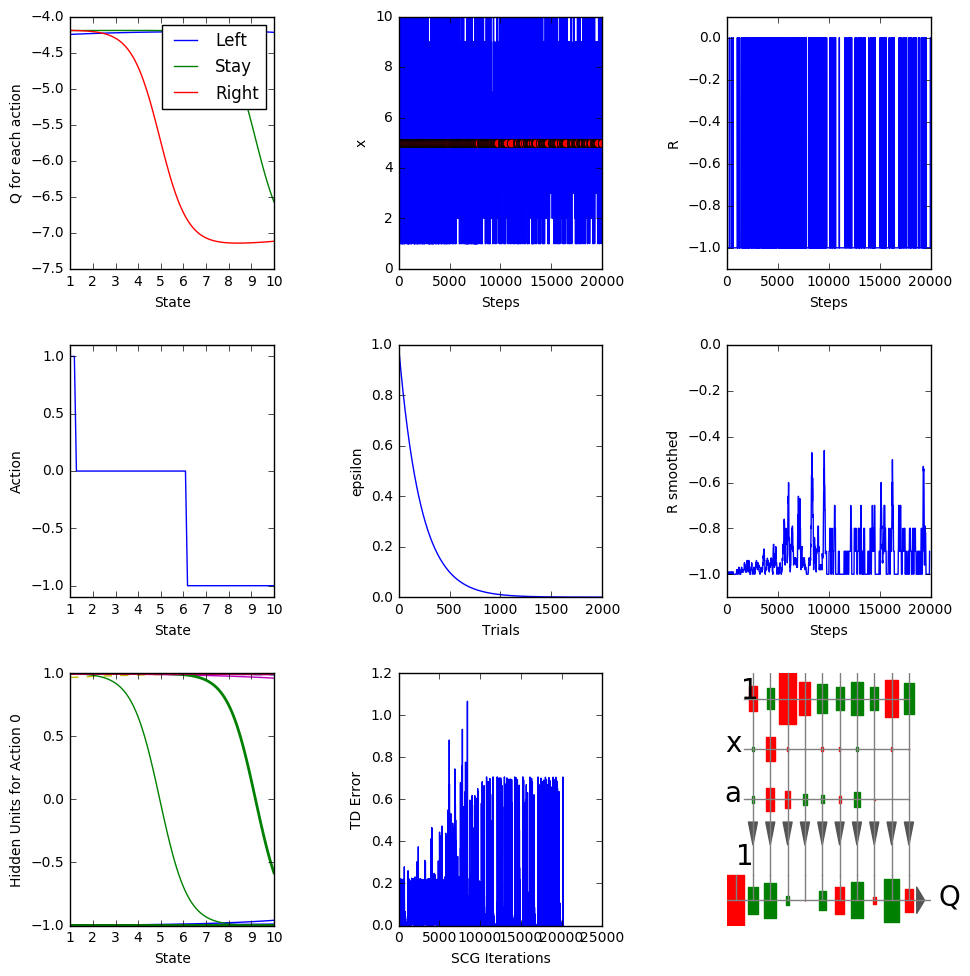

In [9]:
from IPython.display import display, clear_output

epsilon = 1

nnetQ = nn.NeuralNetwork([2, nHidden, 1])
nnetQ.setInputRanges(((1,10),(-1,1)))

fig = plt.figure(figsize=(10,10))

xTrace = np.zeros((nTrials*nStepsPerTrial,2)) # (x,a, r)
rTrace = np.zeros((nTrials*nStepsPerTrial,1))
errorTrace = []
epsilonTrace = np.zeros((nTrials,1))

for trial in range(nTrials):
    X,R,Qn = makeSamples(nnetQ,  initialState, nextState, reinf, validActions, nStepsPerTrial, epsilon)
    epsilon *= epsilonDecay
 
    nnetQ.train(X, R + gamma*Qn, nIterations=nSCGIterations)
    
    epsilonTrace[trial] = epsilon
    i = trial*nStepsPerTrial
    j = i + nStepsPerTrial
    xTrace[ i:j,:] = X
    rTrace[i:j,:] = R
    errorTrace = nnetQ.getErrorTrace()

    # Rest of this loop is for plots.
    if True and (trial+1) % int(nTrials*0.1+0.5) == 0:
        
        fig.clf()
        plotStatus()
        clear_output(wait=True)
        display(fig)
    
clear_output(wait=True)

In [10]:
def run(nTrials,nStepsPerTrial,nSCG,nHidden,gamma, finalEpsilon):
    epsilon = 1
    epsilonDecay =  np.exp(np.log(finalEpsilon)/nTrials) # to produce this final value

    nnetQ = nn.NeuralNetwork([2, nHidden, 1])
    rSum = 0
    for trial in range(nTrials):
        X,R,Qn = makeSamples(nnetQ,  initialState, nextState, reinf, validActions, nStepsPerTrial, epsilon)
        rSum += np.sum(R)
        epsilon *= epsilonDecay
        nnetQ.train(X, R + gamma*Qn, nIterations=nSCGIterations)
        
    return rSum / (nTrials * nStepsPerTrial)

In [ ]:
import time
start = time.time()
result = []
for nT in (10,100,1000):
    print('nT is',nT)
    for nS in (10,20,50,100):
        for nSCG in (5,10,50,100):
            for nH in (2,5,10,):
                for g in (0.5,0.9):
                    for fep in (0.0001,0.01,):
                        r = run(nT,nS,nSCG, nH,g,fep)
                        result.append([nT,nS,nSCG,nH,g,fep,r])
                        # print(result[-1])
print('Took', time.time() - start,'seconds')

nT is 10
nT is 100


In [21]:
2779/60, 'minutes'

(46.317, 'minutes')

In [19]:
result = np.array(result)
order = np.argsort(-result[:,6])
for o in result[order[:20],:]:
    fmt = 'Trials {:4d} StepsPerTrial {:3d} nSCG {:3d} nHidden {:2d} g {:.1f} ep {:.4f} r {:.2f}'
    print(fmt.format(int(o[0]),int(o[1]),int(o[2]),int(o[3]),o[4],o[5],o[6]))

Trials 1000 StepsPerTrial  20 nSCG 100 nHidden  5 g 0.9 ep 0.0001 r -0.44
Trials 1000 StepsPerTrial  20 nSCG 100 nHidden 10 g 0.5 ep 0.0001 r -0.46
Trials  100 StepsPerTrial  10 nSCG  50 nHidden 10 g 0.9 ep 0.0001 r -0.52
Trials 1000 StepsPerTrial  50 nSCG  10 nHidden  2 g 0.5 ep 0.0001 r -0.52
Trials 1000 StepsPerTrial  20 nSCG 100 nHidden 10 g 0.9 ep 0.0001 r -0.53
Trials 1000 StepsPerTrial  50 nSCG 100 nHidden  5 g 0.5 ep 0.0001 r -0.53
Trials 1000 StepsPerTrial 100 nSCG 100 nHidden  2 g 0.5 ep 0.0001 r -0.54
Trials  100 StepsPerTrial  10 nSCG  10 nHidden  2 g 0.5 ep 0.0001 r -0.54
Trials 1000 StepsPerTrial  50 nSCG   5 nHidden 10 g 0.5 ep 0.0001 r -0.54
Trials 1000 StepsPerTrial  50 nSCG 100 nHidden 10 g 0.5 ep 0.0001 r -0.55
Trials 1000 StepsPerTrial 100 nSCG  10 nHidden 10 g 0.5 ep 0.0001 r -0.55
Trials 1000 StepsPerTrial  20 nSCG  10 nHidden 10 g 0.5 ep 0.0001 r -0.55
Trials 1000 StepsPerTrial  20 nSCG   5 nHidden 10 g 0.5 ep 0.0001 r -0.55
Trials 1000 StepsPerTrial 100 nSCG  50